In [8]:
import matplotlib.pyplot as plt

In [22]:
class TrainSchedule:
    def __init__(self):
        self.train_lines = {}  # 用于存储所有车次的信息
        self.fig, self.ax = plt.subplots()
        self.ax.set_xlim(0, 60)  # 设置横坐标范围
        plt.xticks(range(0, 61, 5))  # 设置横坐标刻度
        plt.grid(True)  # 显示网格

    def add_train_line(self, line_name):
        """新增车次，并初始化该车次的数据结构"""
        if line_name not in self.train_lines:
            self.train_lines[line_name] = {
                "stations": {},
                "departure_times": {},
                "station_positions": {}
            }
        self.update_y_axis()

    def add_station(self, line_name, station_name, station_time):
        """为指定车次添加站点"""
        line = self.train_lines.get(line_name)
        if line and station_name not in line["stations"]:
            position = len(line["stations"]) + 1
            line["station_positions"][station_name] = position
            line["stations"][station_name] = station_time
            line["departure_times"][station_name] = station_time
        self.update_y_axis()

    def connect_stations(self, line_name, station1, station2):
        """连接指定车次的两个站点"""
        line = self.train_lines.get(line_name)
        if line and station1 in line["departure_times"] and station2 in line["stations"]:
            y1, y2 = line["station_positions"][station1], line["station_positions"][station2]
            x1, x2 = line["departure_times"][station1], line["stations"][station2]
            self.ax.plot([x1, x2], [y1, y2], 'b-')

    def add_stop_duration(self, line_name, station, duration):
        """为指定车次的站点添加停留时间"""
        line = self.train_lines.get(line_name)
        if line and station in line["stations"]:
            y_position = line["station_positions"][station]
            x_start = line["stations"][station]
            x_end = x_start + duration
            self.ax.plot([x_start, x_end], [y_position, y_position], 'r-')
            line["departure_times"][station] = x_end

    def update_y_axis(self):
        """更新y轴，以显示所有车次的所有站点名称作为y轴的标签"""
        all_station_names = set()
        for line in self.train_lines.values():
            all_station_names.update(line["station_positions"].keys())

        sorted_station_names = sorted(list(all_station_names))
        station_position_mapping = {name: i+1 for i, name in enumerate(sorted_station_names)}

        # 更新每个车次的站点位置信息
        for line in self.train_lines.values():
            for station_name in line["station_positions"].keys():
                line["station_positions"][station_name] = station_position_mapping[station_name]

        if sorted_station_names:
            self.ax.set_ylim(0, len(sorted_station_names) + 1)
            plt.yticks(range(1, len(sorted_station_names) + 1), sorted_station_names)
        else:
            self.ax.set_ylim(0, 1)
            plt.yticks([])

        self.ax.invert_yaxis()  # 倒置y轴

    def show(self):
        """显示图表"""
        plt.show()


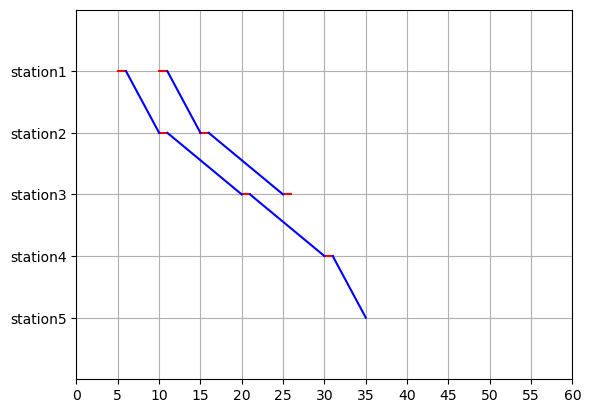

In [23]:
# 实例化TrainSchedule
schedule = TrainSchedule()

# 添加车次
schedule.add_train_line('Train A')
schedule.add_train_line('Train B')

# 为车次A添加站点及停留时间
schedule.add_station('Train A', 'station1', 5)
schedule.add_stop_duration('Train A', 'station1', 1)
schedule.add_station('Train A', 'station2', 10)
schedule.add_stop_duration('Train A', 'station2', 1)
schedule.add_station('Train A', 'station3', 20)
schedule.add_stop_duration('Train A', 'station3', 1)
schedule.add_station('Train A', 'station4', 30)
schedule.add_stop_duration('Train A', 'station4', 1)
schedule.add_station('Train A', 'station5', 35)

# 连接Train A的站点
schedule.connect_stations('Train A', 'station1', 'station2')
schedule.connect_stations('Train A', 'station2', 'station3')
schedule.connect_stations('Train A', 'station3', 'station4')
schedule.connect_stations('Train A', 'station4', 'station5')

# 为车次B添加站点及停留时间
schedule.add_station('Train B', 'station1', 10)
schedule.add_stop_duration('Train B', 'station1', 1)
schedule.add_station('Train B', 'station2', 15)
schedule.add_stop_duration('Train B', 'station2', 1)
schedule.add_station('Train B', 'station3', 25)
schedule.add_stop_duration('Train B', 'station3', 1)

# 连接Train B的站点
schedule.connect_stations('Train B', 'station1', 'station2')
schedule.connect_stations('Train B', 'station2', 'station3')

# 显示图表
schedule.show()

In [5]:
print('a+\b');
print(r'a+\b');

a+
a+\b
